In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, pi, sqrt

In [34]:
# расчёт взаимной индуктивности между двумя соосными катушками индуктивности в зависимости от расстояния
def mutual_inductance_two_coil(R2_out, R1_in=2.8, R1_out=7, R2_in=3, d=2):
    # расчёт взаимной индуктивности между двумя соосными витками индуктивности в зависимости от расстояния
    def mutual_inductance_two_turns(R1, R2, d=0.5, N=360, K=360):
        df1 = 2*pi/N
        df2=2*pi/K
        M = 0
        for n in range(N):
            for k in range(K):
                r12 = (R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(df1 * n - df2 * k) + d ** 2) ** 0.5
                M += (cos(df2 * k - df1 * n) * df1 * df2) / r12
        M *= R1 * R2 / (4 * pi)
        return M
    M11 = mutual_inductance_two_turns(R1_out, R2_out, d=d)
    M12 = mutual_inductance_two_turns(R1_out, R2_in, d=d)
    M21 = mutual_inductance_two_turns(R1_in, R2_out, d=d)
    M22 = mutual_inductance_two_turns(R1_in, R2_in, d=d)
    M = M11 + M12 + M21 + M22
    return M

# отрисовка и сохранение графика в формате .png
def plot(x, y, title="", save=False, points=[],
         x_label="R2out, см", y_label="M, мкГн",
         path="Взаимная индуктивность между катушками"):
    if title:
        plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)
    if points:
        for point in points:
            plt.scatter(point[0], point[1], c="red")
    if save:
        plt.savefig(f"pictures/{path}")
    plt.show()
    
# расчёт коэффициента заполенения
def fill_factor(R_in, R_out):
    return (R_out - R_in) / (R_out + R_in)

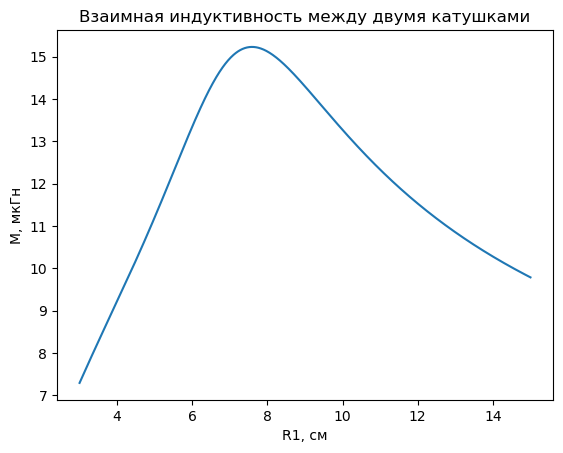

Максимальная взаимная индуктивность: 15.230392619737389
Внешний радиус катушки индуктивности R2out: 7.588588588588588
Коэффициент заполнения второй катушки 0.4333522404991491


In [13]:
R1_out = 7
R1_in = 2.8
R2_out = np.linspace(3, 15, 1000)
R2_in = 3
d = 2

M = mutual_inductance_two_coil(R1_in, R1_out, R2_in, R2_out, d)
plot(R2_out, M)
print(f"Максимальная взаимная индуктивность: {np.max(M)}")
print(f"Внешний радиус катушки индуктивности R2out: {R2_out[np.argmax(M)]}")
print(f"Коэффициент заполнения второй катушки {fill_factor(R2_in, R2_out[np.argmax(M)])}")

In [14]:
# импортируем класс алгоритма hill climbing
from optimization.hill_climbing_algorithms.steepest_ascent_hill_climbing import SteepestAscentHillClimbing

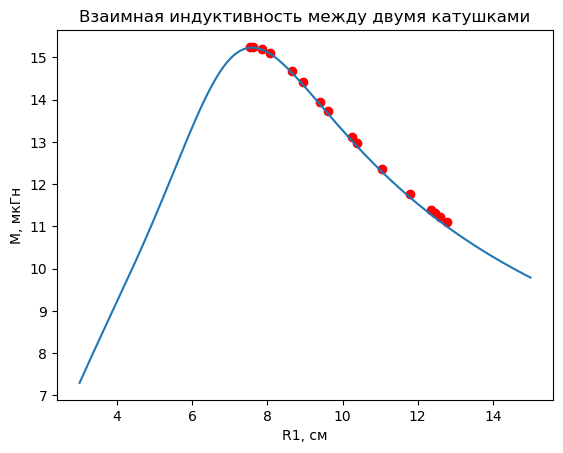

Всего мутаций: 100
Хороших мутаций: 16
Плохих мутаций: 84
Значение радиуса: 7.616830018165285 см


In [15]:
alg = SteepestAscentHillClimbing(iteration=100,
                                start=3, finish=15,
                                fitness=mutual_inductance_two_coil)
alg.run()
plot(R2_out, M, points=alg.good_mutation)
print(f"Всего мутаций: {len(alg.all_mutation)}")
print(f"Хороших мутаций: {len(alg.good_mutation)}")
print(f"Плохих мутаций: {len(alg.bad_mutation)}")
print(f"Значение радиуса: {alg.x0} см")

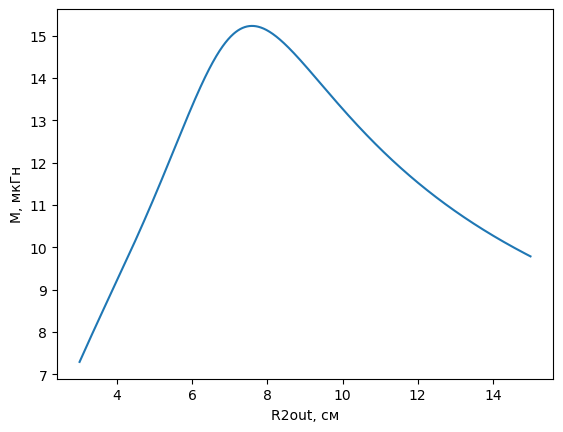

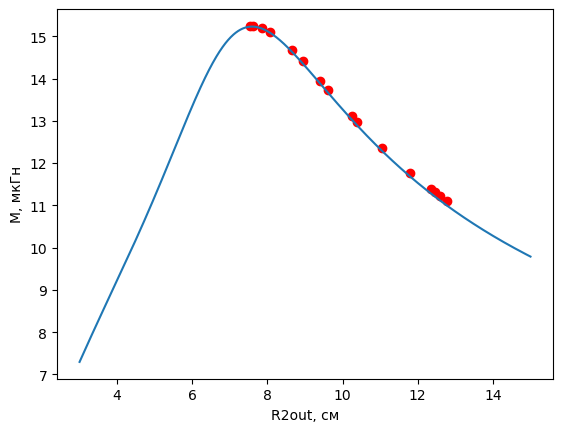

In [35]:
# сохранение графиков
plot(R2_out, M, save=True, path="Взаимная индуктивность между катушками")
plot(R2_out, M, points=alg.good_mutation, save=True, path="Hill Climbing")